/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
✅ RMSE : 1.927941940948889
✅ R² score : 0.29865769049763924


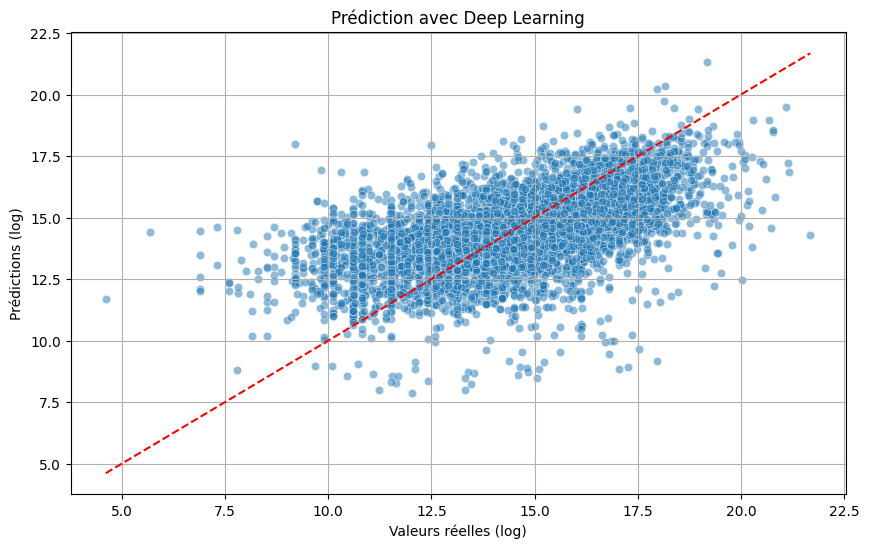

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 🔹 Charger le dataset
path = "/Users/amar/Desktop/Alyra_School/Alyra 2025/4- Projet/investments_VC.csv"
df = pd.read_csv(path, encoding='unicode_escape')

# 🔹 Nettoyage des colonnes
df.columns = df.columns.str.strip().str.lower()

# 🔹 Colonnes utiles
cols = ['country_code', 'market', 'category_list', 'funding_rounds', 'founded_year', 'funding_total_usd']
df = df[cols]

# 🔹 Nettoyage des montants
df['funding_total_usd'] = df['funding_total_usd'].replace(r'[\$,]', '', regex=True)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# 🔹 Nettoyage : suppression des NaN et des montants à 0
df.dropna(inplace=True)
df = df[df['funding_total_usd'] > 0]

# 🔹 Transformation de la cible en log
df['log_funding'] = np.log1p(df['funding_total_usd'])

# 🔹 Encodage des variables catégorielles
X = pd.get_dummies(df.drop(['funding_total_usd', 'log_funding'], axis=1), drop_first=True)

# 🔹 Cible
y = df['log_funding']

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Architecture du réseau
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # sortie = 1 seule valeur continue

model.compile(optimizer='adam', loss='mse')

# 🔹 Entraînement
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# 🔹 Évaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse}")
print(f"✅ R² score : {r2}")

# 🔹 Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valeurs réelles (log)")
plt.ylabel("Prédictions (log)")
plt.title("Prédiction avec Deep Learning")
plt.grid(True)
plt.show()
